In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../../data/togo-dapaong_qc.csv')
df.sample(10)

Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
513017  2022-10-16 06:18   53.0  16.1   49.0   51.7   50.4  22.1  95.2  1.8   
152757  2022-02-08 01:58   -3.6   0.0    0.0    0.0    0.0  22.5  21.4  1.9   
324496  2022-06-07 08:17  348.9   4.4  332.6  319.6  316.3  27.8  70.1  4.3   
394628  2022-07-26 01:09   -1.4   0.0    0.0    0.0    0.0  26.5  78.7  3.3   
178282  2022-02-25 19:23   -4.9   0.0    0.0    0.0    0.0  31.4  12.1  1.4   
96365   2021-12-30 22:06   -4.0   0.0    0.0    0.0    0.0  24.2  19.0  2.4   
512967  2022-10-16 05:28   -1.8   0.0    0.0    0.1    0.1  22.1  94.4  1.4   
95142   2021-12-30 01:43   -3.9   0.0    0.0    0.0    0.0  20.0  27.2  1.5   
325261  2022-06-07 21:02   -1.3   0.0    0.0    0.0    0.0  25.9  72.1  8.0   
118173  2022-01-15 01:34   -3.5   0.0    0.0    0.0    0.0  22.8  24.5  1.9   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
513017     2.4      0.4  248.3     12.1  977         0            0.0   22.5   
152757     2.1      0.3   75.6      6.9  976         0            0.0   21.4   
324496     5.9      1.1  216.0     10.2  980         0            0.0   35.9   
394628     4.4      0.9  258.4     10.9  976         0            0.0   26.4   
178282     1.9      0.4   50.6      9.0  974         0            0.0   29.3   
96365      2.9      0.4   42.1      7.8  978         0            0.0   22.6   
512967     2.1      0.6  252.3      8.8  977         0            0.0   21.6   
95142      1.6      0.4   74.7      2.8  977         0            0.0   18.0   
325261    11.2      1.7  149.7     17.6  979         0            0.0   26.6   
118173     2.4      0.4   34.7      9.2  979         0            0.0   21.4   

        TModB  Comments  
513017   22.3       NaN  
152757   21.0       NaN  
324496   41.1       NaN  
394628   26.0       NaN  
178282   29.2       NaN  
96365    22.5       NaN  
512967   21.3       NaN  
95142    17.7       NaN  
325261   26.3       NaN  
118173   21.2       NaN

In [3]:
df.describe(include='number')

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

In [4]:
# Check for missing values
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# List columns with more than 5% missing values
columns_with_nulls = missing_percentage[missing_percentage > 5]
print("Columns with more than 5% missing values:")
print(columns_with_nulls)

# Drop columns with na values
df = df.dropna(subset=['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']).copy()
df = df.reindex().copy()

# remove incorrect entries for GHI, the possible values for Global Horizontal Irradiance (GHI) are between 0 and 1000 W/m²
df = df[(df['GHI'] >= 0) & (df['GHI'] <= 1000)].copy()
# remove incorrect entries for DNI, the possible values for Direct Normal Irradiance (DNI) are between 0 and 1000 W/m²
df = df[(df['DNI'] >= 0) & (df['DNI'] <= 1000)].copy()
# remove incorrect entries for DHI, the possible values for Diffuse Horizontal Irradiance (DHI) are between 0 and 1000 W/m²
df = df[(df['DHI'] >= 0) & (df['DHI'] <= 1000)].copy()


Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [6]:
df.shape

(262403, 19)

In [7]:
# Compute Z-scores for GHI, DNI, and DHI, 'ModA', 'ModB', 'WS', and 'WSgust'
z_scores = zscore(df[['GHI', 'DNI','DHI', 'ModA', 'ModB','WS', 'WSgust']])
# Create a DataFrame for Z-scores to align indices
z_scores_df = pd.DataFrame(z_scores, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], index=df.index)

# Identify outliers using Z-scores
# A Z-score greater than 3 or less than -3 is typically considered an outlier
# Filter the DataFrame to get the outliers
outliers = df[np.abs(z_scores_df) > 3].any(axis=1)

# Display the outliers
print("Outliers based on Z-scores:")
outliers

Outliers based on Z-scores:


342       False
343       False
344       False
345       False
346       False
          ...  
525584    False
525585    False
525586    False
525587    False
525588    False
Length: 262403, dtype: bool

In [8]:
# Drop rows with outliers
df_cleaned = df.loc[~outliers].reset_index(drop=True).copy()
df_cleaned.shape

(260729, 19)

In [9]:
# Exporting the cleaned DataFrame to a CSV file
df_cleaned.to_csv('../../data/togo-cleaned.csv', index=False)

In [10]:
# Convert the 'Timestamp' column to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned.set_index('Timestamp', inplace=True)

/tmp/ipykernel_2573050/1365393608.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_ghi = df_cleaned['GHI'].resample('M').mean()


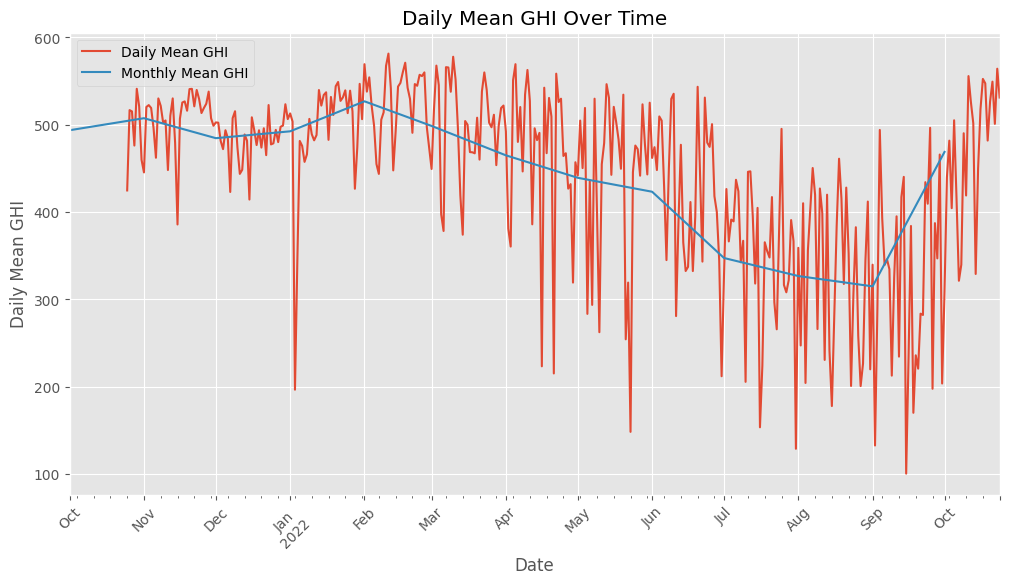

In [34]:
# Calculate daily mean GHI
daily_mean_ghi = df_cleaned['GHI'].resample('D').mean()
monthly_mean_ghi = df_cleaned['GHI'].resample('M').mean()


# Plot daily mean GHI
plt.figure(figsize=(12, 6))
daily_mean_ghi.plot()
monthly_mean_ghi.plot()
plt.title("Daily Mean GHI Over Time")
plt.legend(['Daily Mean GHI', 'Monthly Mean GHI'])
plt.xlabel("Date")
plt.ylabel("Daily Mean GHI")
plt.xticks(rotation=45)
plt.show()

#### GHI Over Time

This block plots the Global Horizontal Irradiance (GHI) over time using a line plot. It helps visualize the temporal trends and variability in solar irradiance throughout the dataset period.

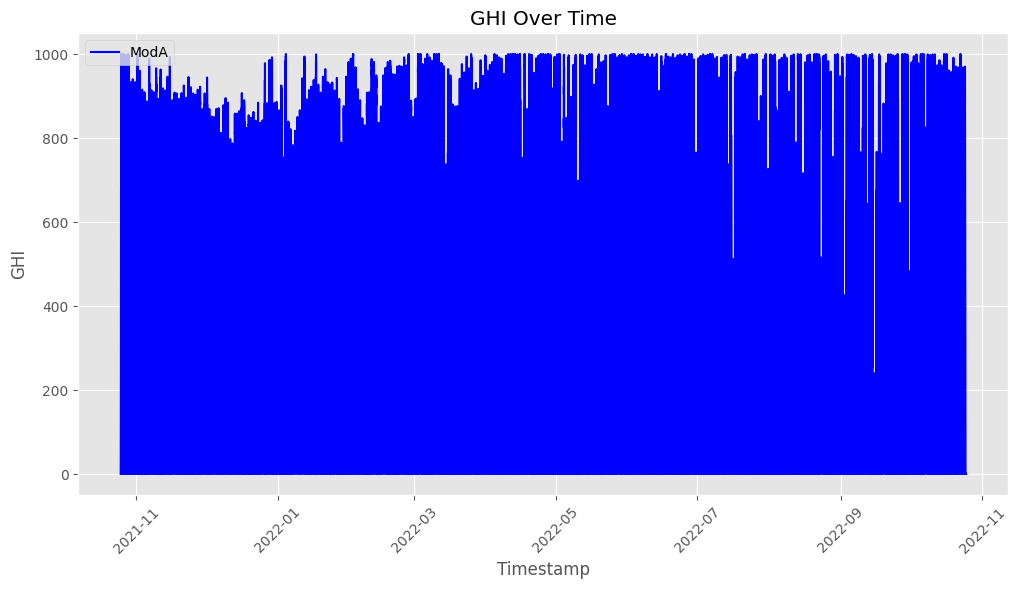

In [11]:

# Plot GHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['GHI'], label='ModA', color='blue')
plt.title("GHI Over Time")
plt.xticks(rotation=45)
plt.show()

#### DNI Over Time

This block plots the Direct Normal Irradiance (DNI) over time. The line plot allows you to observe how DNI changes across the recorded timestamps, highlighting daily and seasonal patterns.

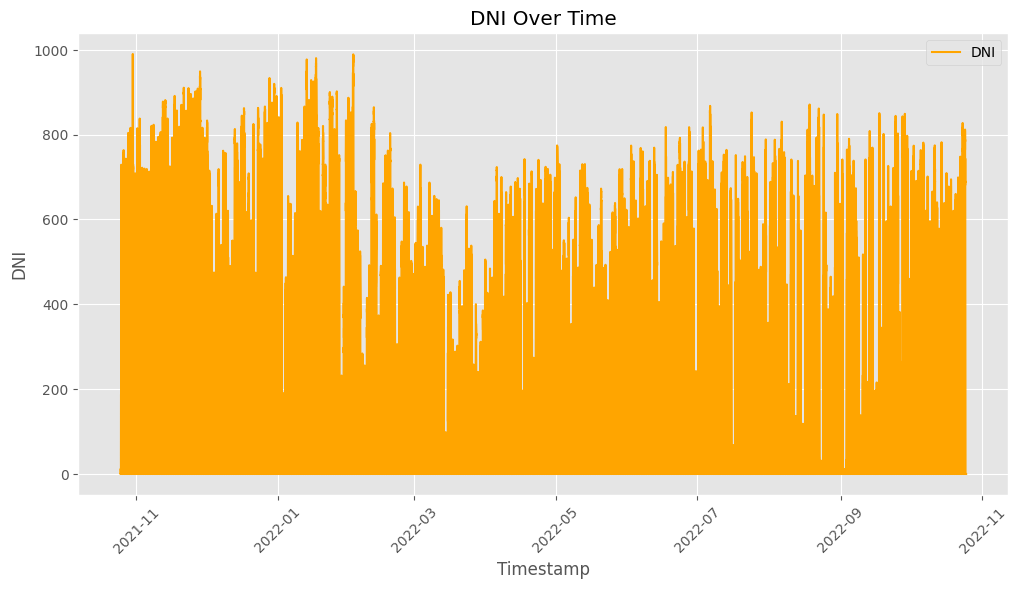

In [12]:
# Plot DNI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DNI'], label='DNI', color='orange')
plt.title("DNI Over Time")
plt.xticks(rotation=45)
plt.show()

#### DHI Over Time

This block plots the Diffuse Horizontal Irradiance (DHI) over time. The visualization helps in understanding the contribution of diffuse sunlight to the total irradiance.

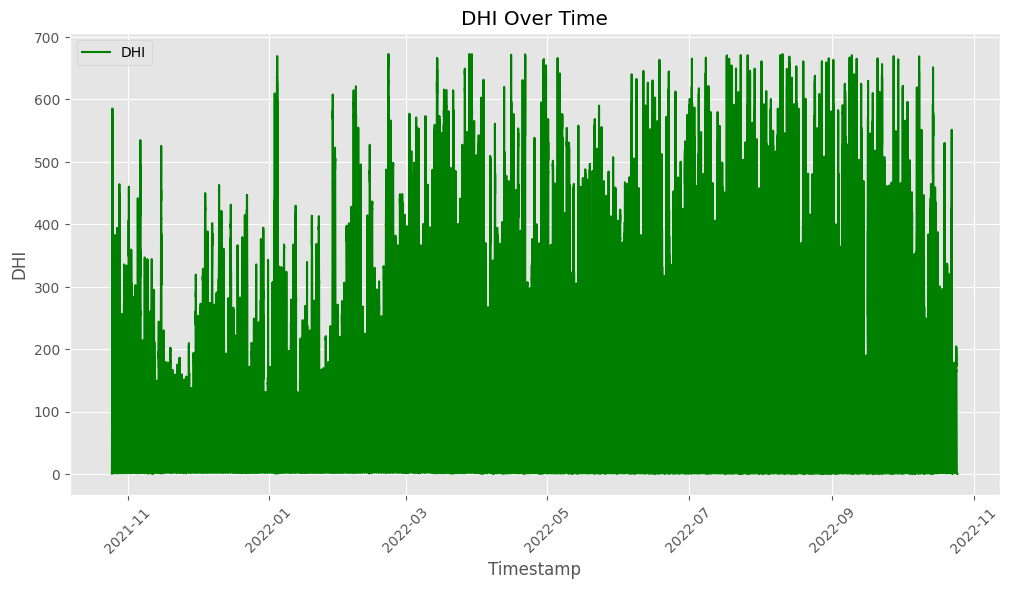

In [13]:
# Plot DHI over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['DHI'], label='DHI', color='green')
plt.title("DHI Over Time")
plt.xticks(rotation=45)
plt.show()

#### Tamb Over Time

This block plots the ambient temperature (Tamb) over time. It provides insights into temperature fluctuations and their possible impact on solar panel performance.

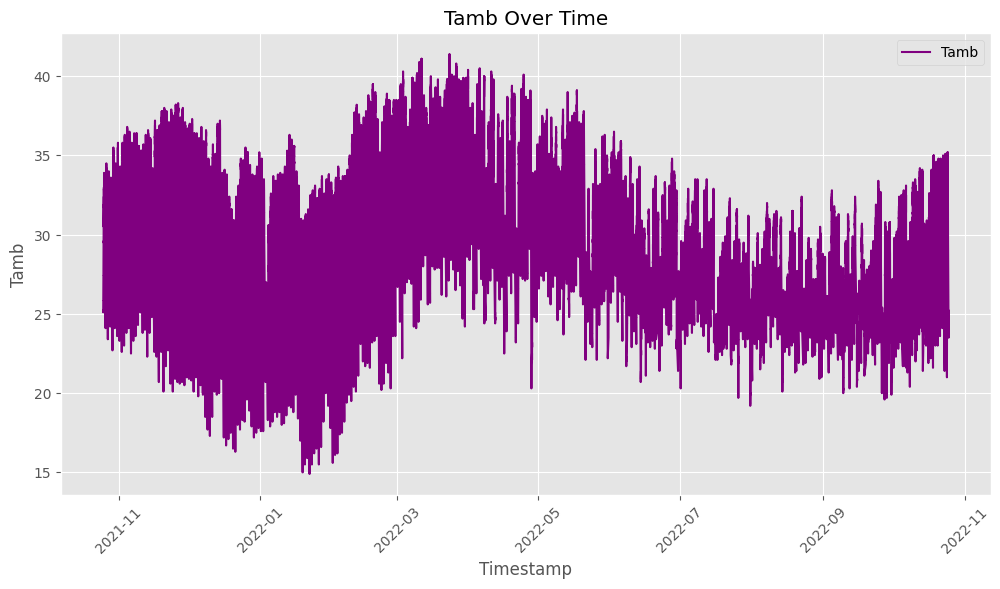

In [14]:
# Plot Tamb  over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_cleaned.index, y=df_cleaned['Tamb'], label='Tamb', color='purple')
plt.title("Tamb Over Time")
plt.xticks(rotation=45)
plt.show()

#### Average ModA & ModB Pre/Post Cleaning

This block groups the data by the 'Cleaning' status and calculates the mean values of ModA and ModB before and after cleaning. The resulting bar plot shows the effect of cleaning on module performance.

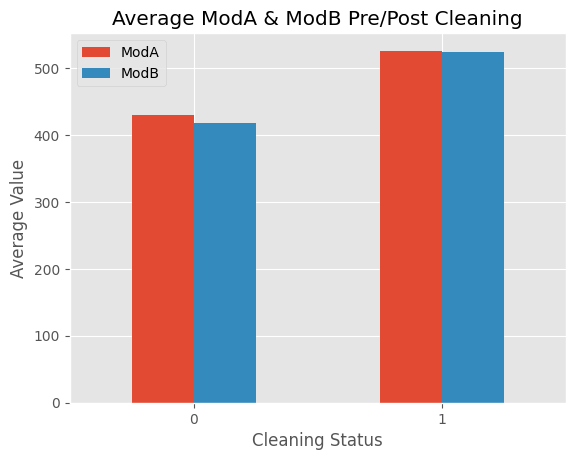

In [15]:
# Group by 'Cleaning' and calculate the mean of ModA and ModB
mod_means = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot the averages
mod_means.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar')
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.xticks(rotation=0)
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, TModA, and TModB, providing a visual summary of how these variables are interrelated.

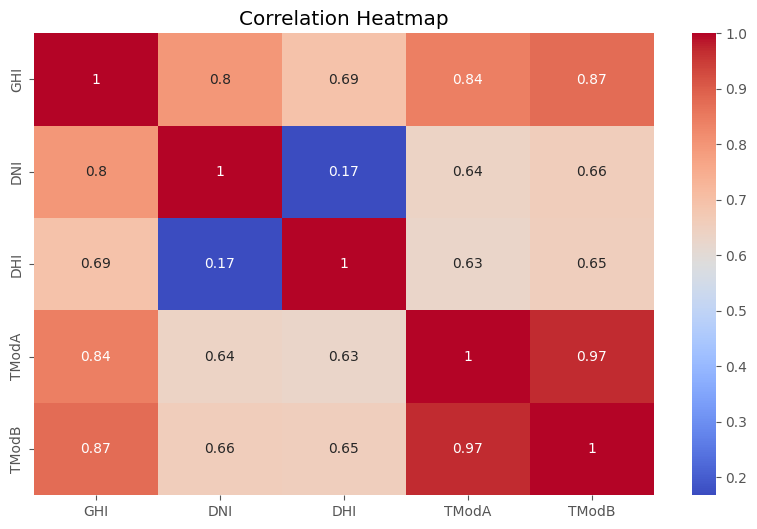

In [16]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, RH, and Tamb, providing a visual summary of how these variables are interrelated.

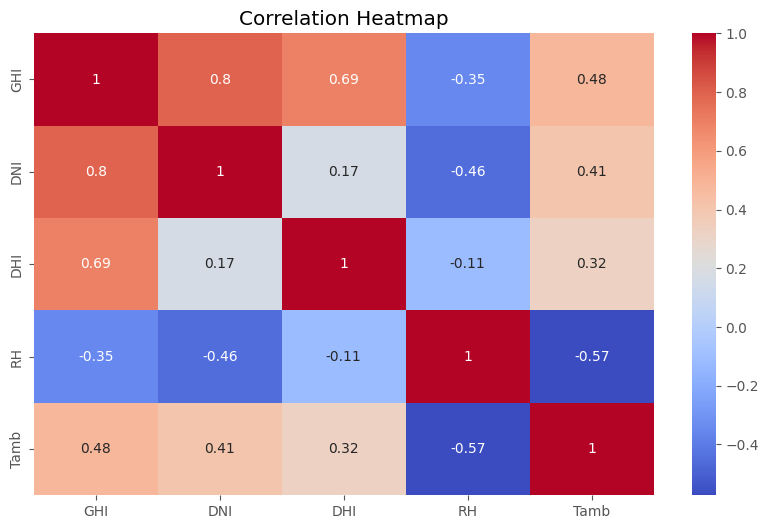

In [17]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'RH', 'Tamb']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Heatmap

This block repeats the correlation heatmap for GHI, DNI, DHI, WS, and WD, providing a visual summary of how these variables are interrelated.

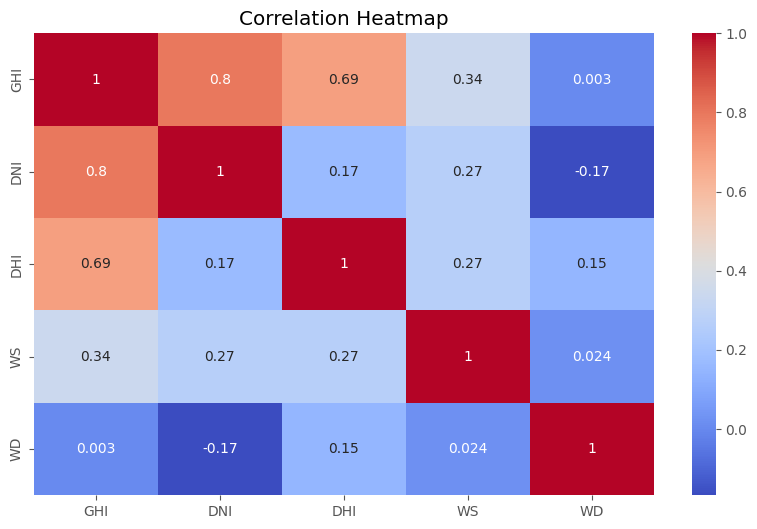

In [24]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'WS', 'WD']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Scatter Plots: WS, WSgust, WD vs. GHI

These blocks create scatter plots to explore the relationships between wind speed (WS), wind gust (WSgust), wind direction (WD), and GHI. They help identify if wind conditions have any observable effect on solar irradiance.

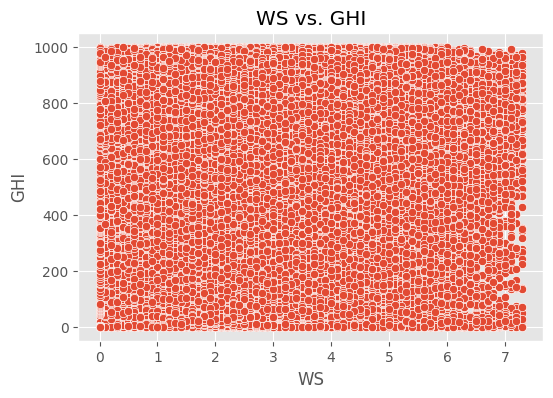

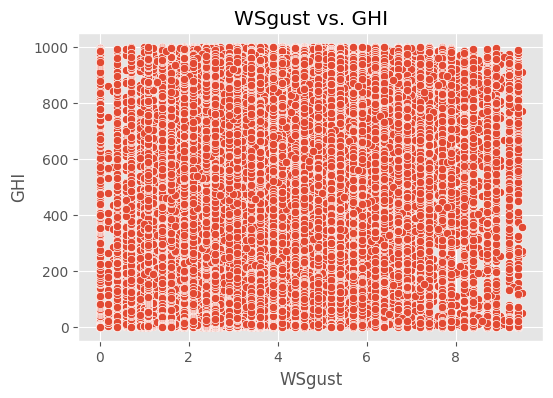

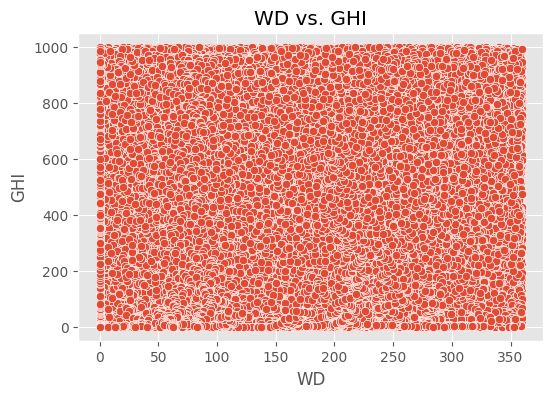

In [18]:
# Scatter plot: WS vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WS'], y=df_cleaned['GHI'])
plt.title('WS vs. GHI')
plt.xlabel('WS')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WSgust vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WSgust'], y=df_cleaned['GHI'])
plt.title('WSgust vs. GHI')
plt.xlabel('WSgust')
plt.ylabel('GHI')
plt.show()

# Scatter plot: WD vs. GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_cleaned['WD'], y=df_cleaned['GHI'])
plt.title('WD vs. GHI')
plt.xlabel('WD')
plt.ylabel('GHI')
plt.show()


#### Scatter Plots: RH vs. Tamb, RH vs. GHi, and TMod vs. GHI

These blocks generate scatter plots to examine how relative humidity (RH) relates to ambient temperature (Tamb) and GHI. They help assess whether humidity influences temperature readings or solar radiation.

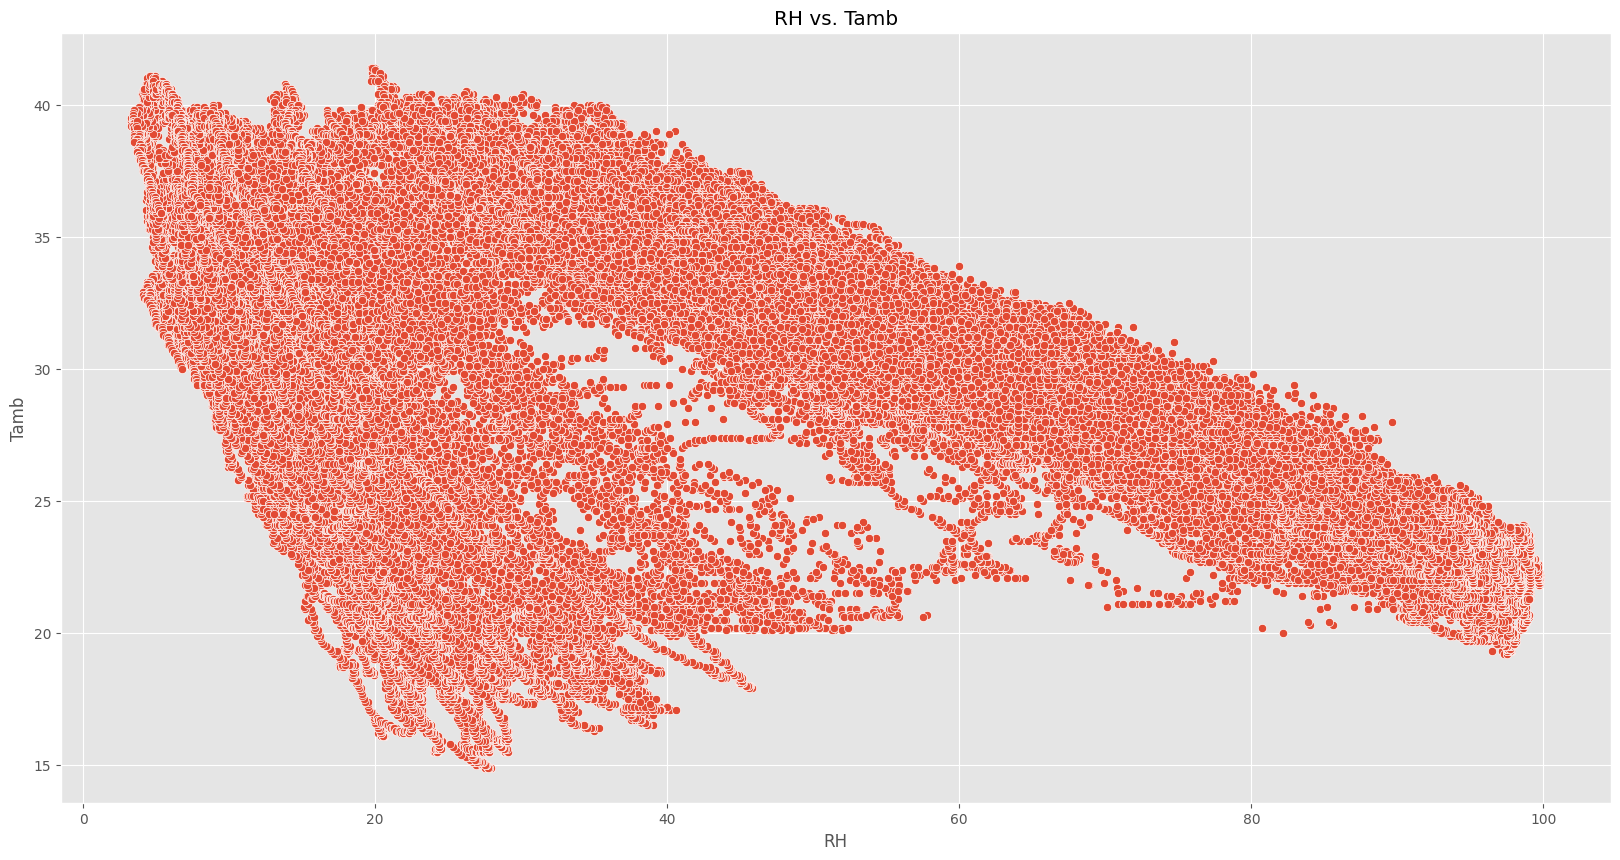

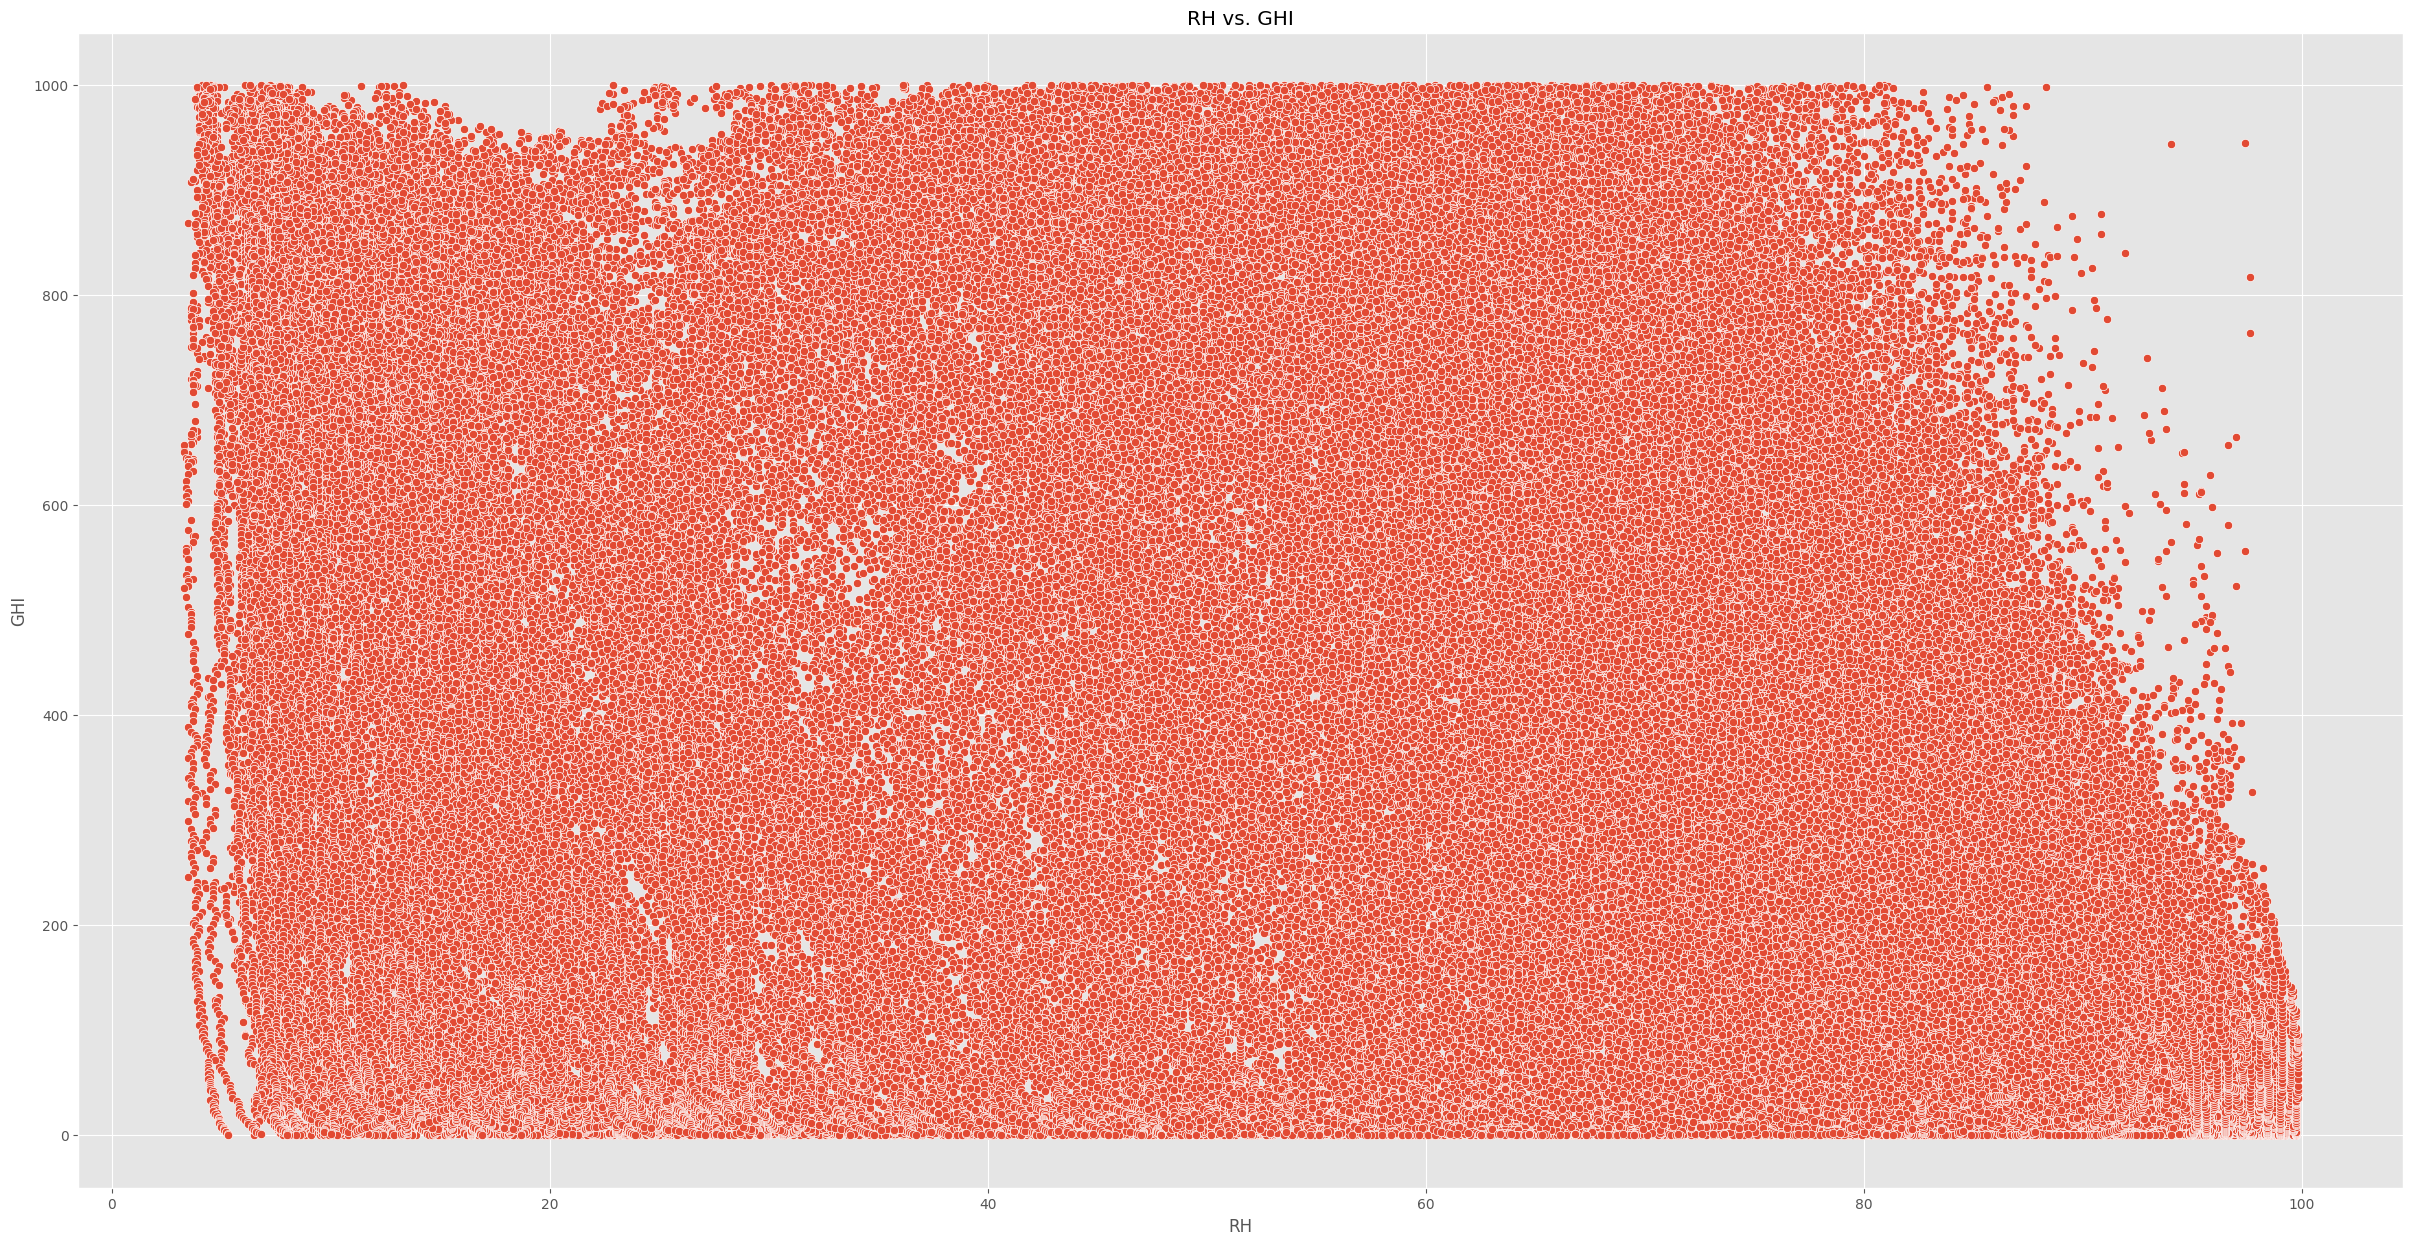

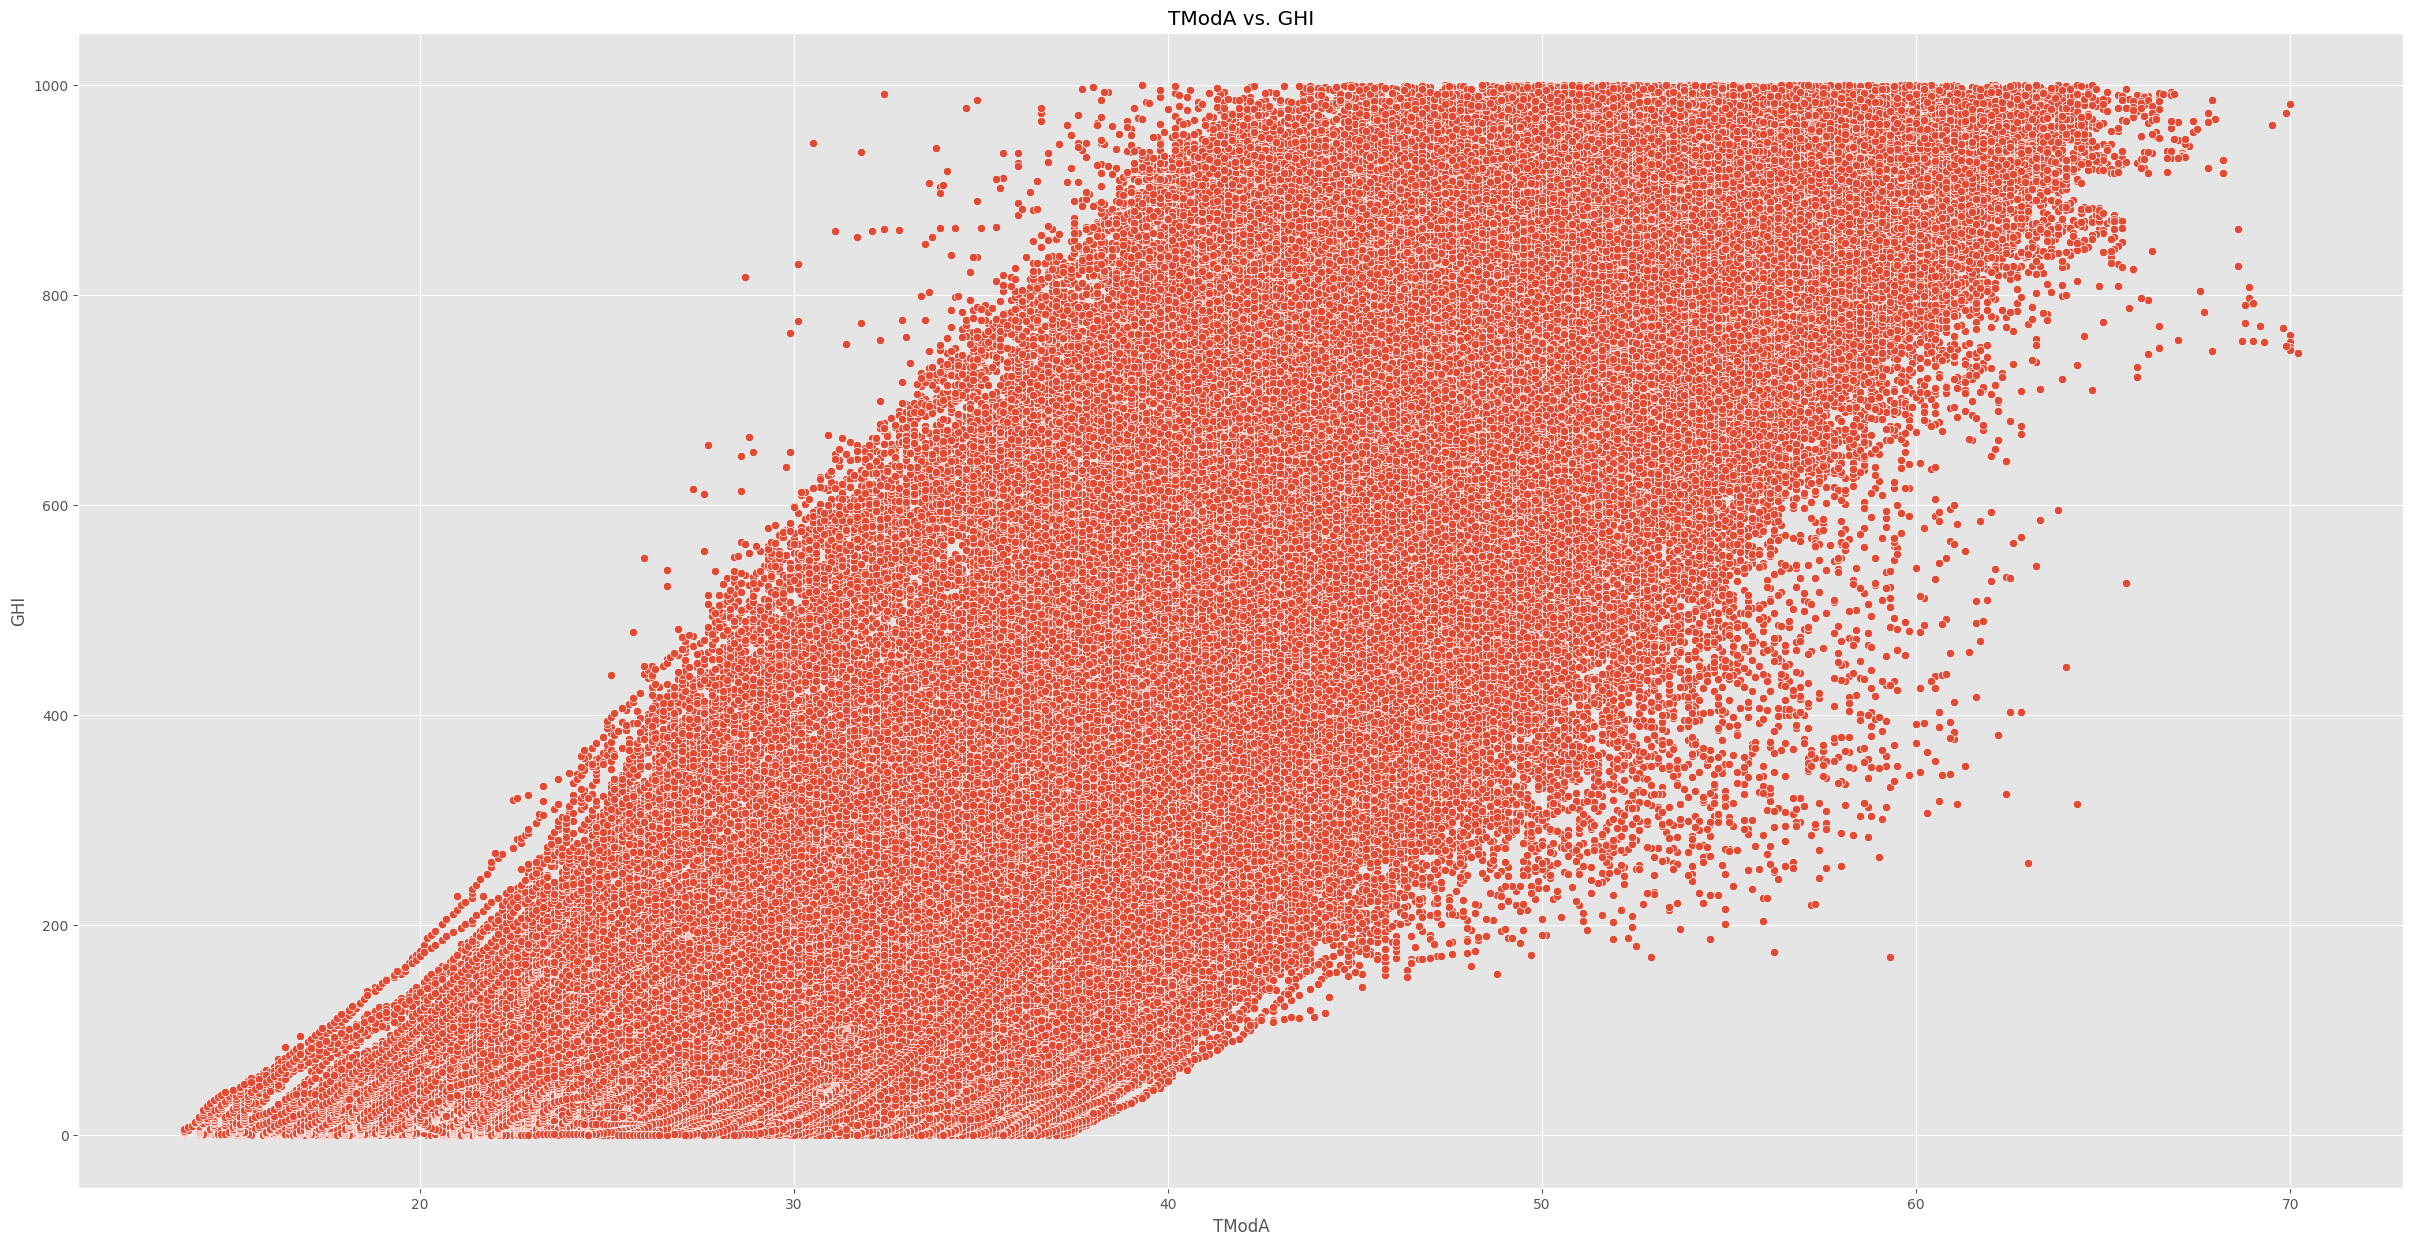

In [35]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(20, 10))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['Tamb'])
plt.title('RH vs. Tamb')
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.show()

# Scatter plot: RH vs. GHI
plt.figure(figsize=(30, 15))
sns.scatterplot(x=df_cleaned['RH'], y=df_cleaned['GHI'])
plt.title('RH vs. GHI')
plt.xlabel('RH')
plt.ylabel('GHI')
plt.show()

# Scatter plot: TModA vs. GHI
plt.figure(figsize=(30, 15))
sns.scatterplot(x=df_cleaned['TModA'], y=df_cleaned['GHI'])
plt.title('TModA vs. GHI')
plt.xlabel('TModA')
plt.ylabel('GHI')
plt.show()

#### Correlation Coefficients: RH vs. Tamb and RH vs. GHI

This block calculates and prints the correlation coefficients between RH and Tamb, and RH and GHI. These values quantify the strength and direction of the relationships observed in the previous scatter plots.

In [20]:
# Calculate and print correlation coefficients
corr_rh_tamb = df_cleaned['RH'].corr(df_cleaned['Tamb'])
corr_rh_ghi = df_cleaned['RH'].corr(df_cleaned['GHI'])
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")

Correlation between RH and Tamb: -0.57
Correlation between RH and GHI: -0.35


#### Wind Rose (WS/WD)

This block creates a wind rose plot to visualize the distribution of wind speed and direction. It provides a comprehensive view of wind patterns at the site.

<Figure size 800x800 with 0 Axes>

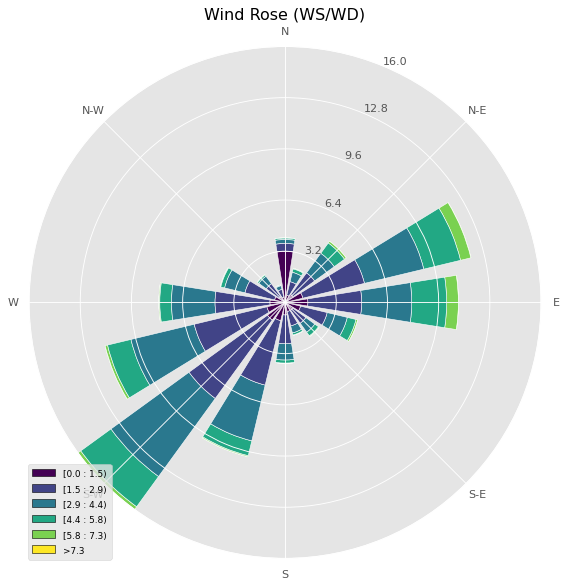

In [21]:
from windrose import WindroseAxes

# Wind rose plot for Wind Speed (WS) and Wind Direction (WD)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose (WS/WD)')
ax.set_legend()
plt.show()

#### Histograms: GHI and WS

These blocks plot histograms for GHI and wind speed (WS), showing the frequency distribution of these variables. The histograms help identify typical values and the spread of the data.

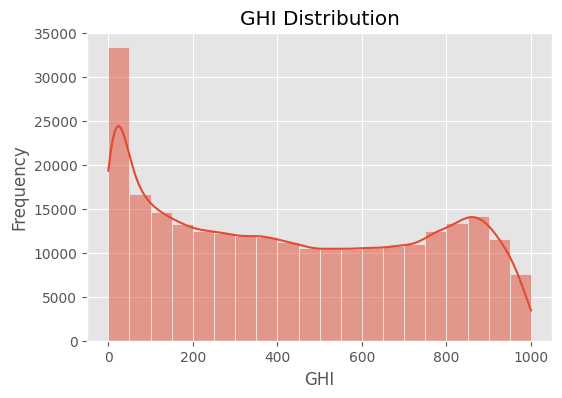

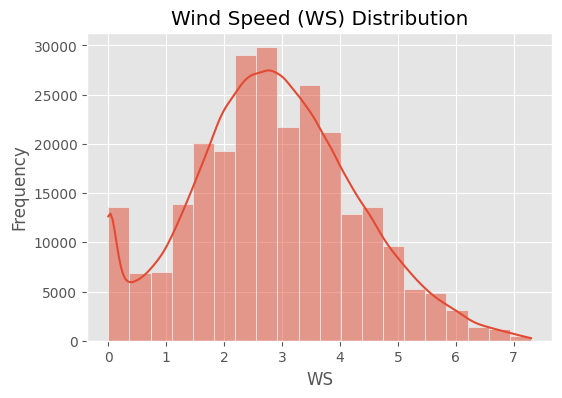

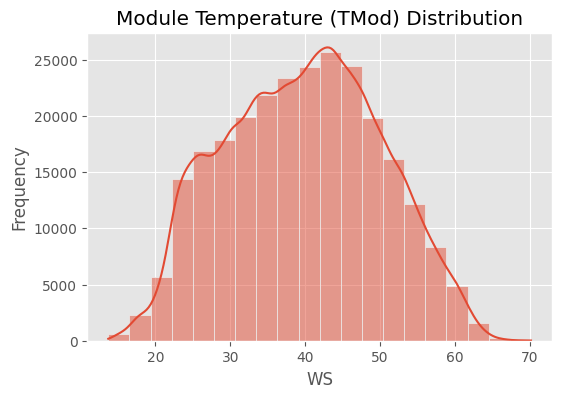

In [29]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['GHI'], bins=20, kde=True)
plt.title("GHI Distribution")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

# Histogram for WS
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['WS'], bins=20, kde=True)
plt.title("Wind Speed (WS) Distribution")
plt.xlabel("WS")
plt.ylabel("Frequency")
plt.show()

# Histogram for TmodA
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['TModA'], bins=20, kde=True)
plt.title("Module Temperature (TMod) Distribution")
plt.xlabel("WS")
plt.ylabel("Frequency")
plt.show()

#### Bubble Chart: GHI vs. Tamb (Bubble Size = RH)

This block creates a bubble chart where GHI is plotted against Tamb, and the size and color of each bubble represent the relative humidity (RH). This visualization allows for multi-dimensional analysis of how temperature and humidity interact with solar irradiance.

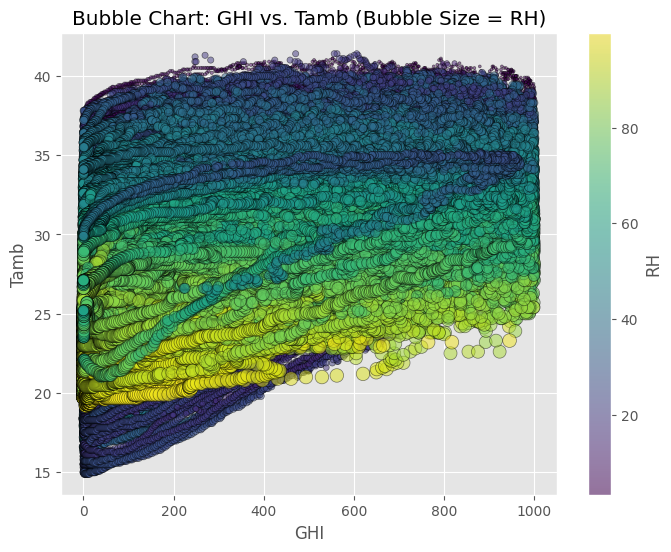

In [23]:
# Bubble chart: GHI vs. Tamb, bubble size = RH
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], 
            s=df_cleaned['RH'],  # Bubble size
            alpha=0.5, c=df_cleaned['RH'], cmap='viridis', edgecolor='k')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH')
plt.show()